# **Perovskite Exploratory Data Analysis Notebook**

This notebook demonstrates:
- Loading a perovskite dataset.
- Univariate and bivariate analyses.
- Correlation matrix and advanced correlation analysis.
- Principal Component Analysis (PCA) and KMeans clustering.
- Visualizing pairwise relationships (pairplot).

In [5]:
# In[1]: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

sns.set(style='whitegrid')  # Optional aesthetic
%matplotlib inline

# If you get warnings from certain libraries, you can suppress them:
import warnings
warnings.filterwarnings('ignore')


## **Step 1: Load and Clean Data**
Choose which CSV file to analyze (e.g., `perovsite_database_query.csv` or `modified_file.csv`).
- **`numerical_columns`** are the features we're focusing on.
- Rows with `NaN` values in these columns will be dropped.


In [6]:
# In[2]: Load the dataset and drop NaN rows
file_path = 'perovskite_database_query.csv'  # or 'modified_file.csv'
# Read CSV
data_cleaned = pd.read_csv(file_path)

# Define the numerical columns of interest
numerical_columns = ['Perovskite_band_gap', 'JV_default_PCE', 'JV_default_Voc', 'JV_default_Jsc', 'JV_default_FF']

# Reduce the dataset to only these columns to save memory
data_reduced = data_cleaned[numerical_columns].copy()

# Convert each numerical column to numeric, coercing errors to NaN
for col in numerical_columns:
    data_reduced[col] = pd.to_numeric(data_reduced[col], errors='coerce')

# Drop rows where any numerical column is NaN
data_reduced.dropna(inplace=True)

print('First 5 rows of cleaned data:')
display(data_reduced.head())
print('\nData shape after cleaning:', data_reduced.shape)

First 5 rows of cleaned data:


,Perovskite_band_gap,JV_default_PCE,JV_default_Voc,JV_default_Jsc,JV_default_FF
0,1.27,0.00,0.002,0.22,0.57
4,1.75,0.10,0.190,1.57,0.34
5,1.27,1.66,0.210,27.67,0.29
6,1.37,1.67,0.289,15.06,0.38
7,1.65,1.56,0.311,11.57,0.43



Data shape after cleaning: (30658, 5)


## **Step 2: Univariate Analysis**
- **Histograms** to view distributions of each numerical column.
- **Box plots** to identify potential outliers.

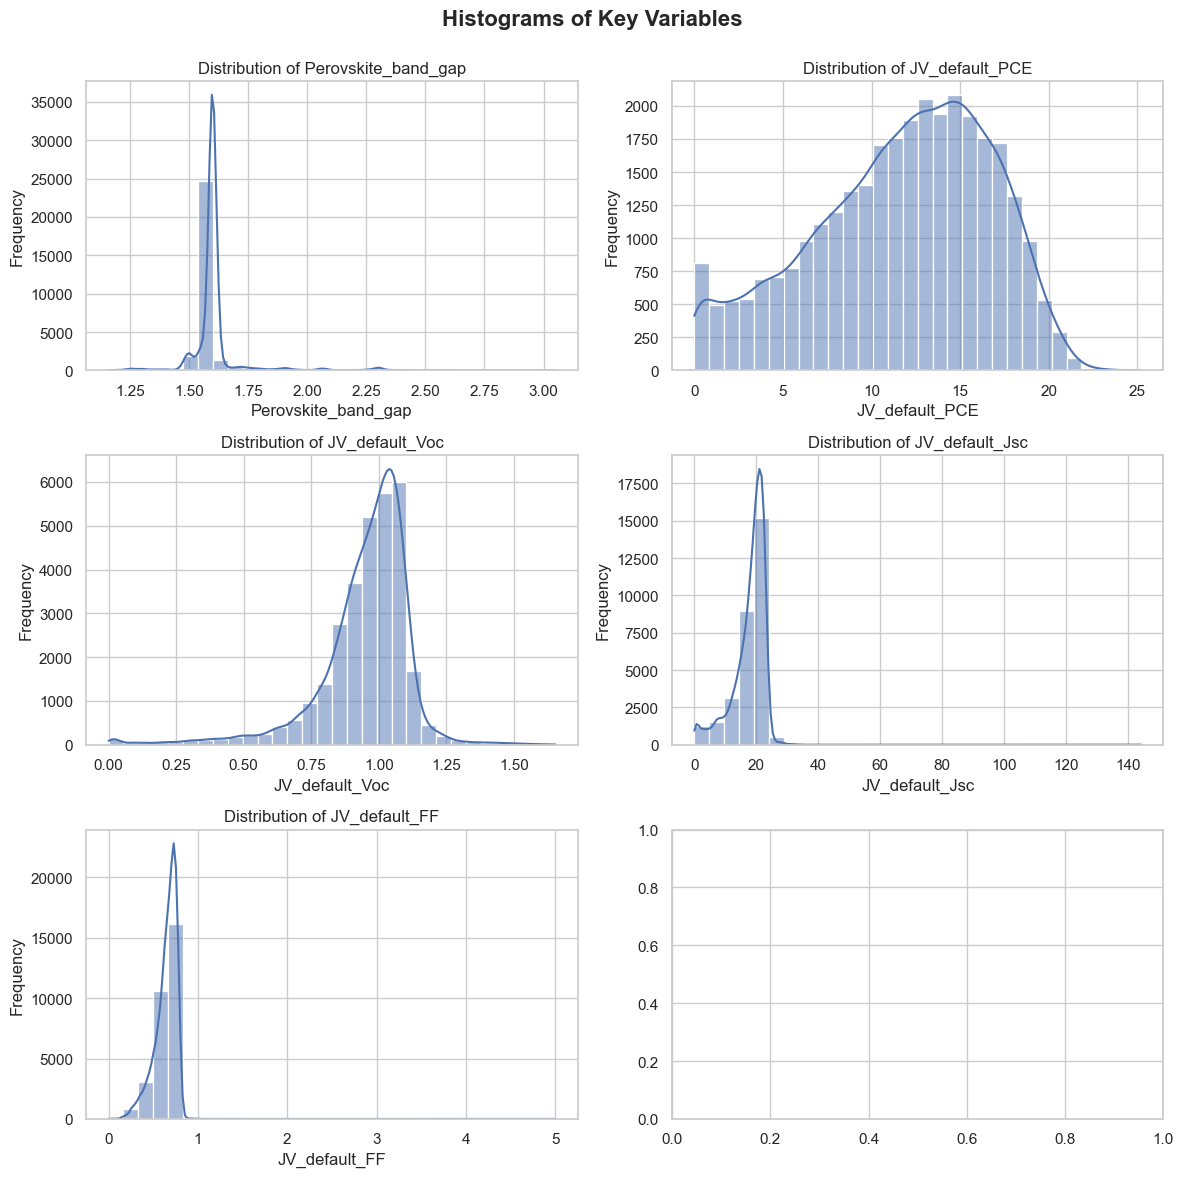

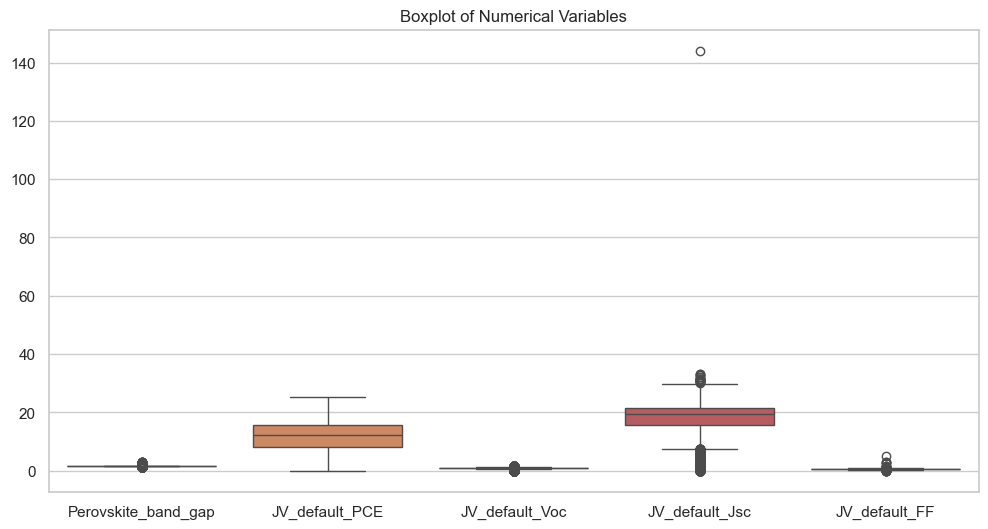

In [7]:
# In[3]: Histograms and Box Plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Histograms of Key Variables', fontsize=16, fontweight='bold')

for ax, col in zip(axes.flatten(), numerical_columns):
    sns.histplot(data_reduced[col], bins=30, ax=ax, kde=True)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

# Box plots for numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_reduced[numerical_columns])
plt.title('Boxplot of Numerical Variables')
plt.show()

## **Step 3: Bivariate Analysis**
Example: Scatter plot between **Perovskite_band_gap** and **JV_default_PCE**.

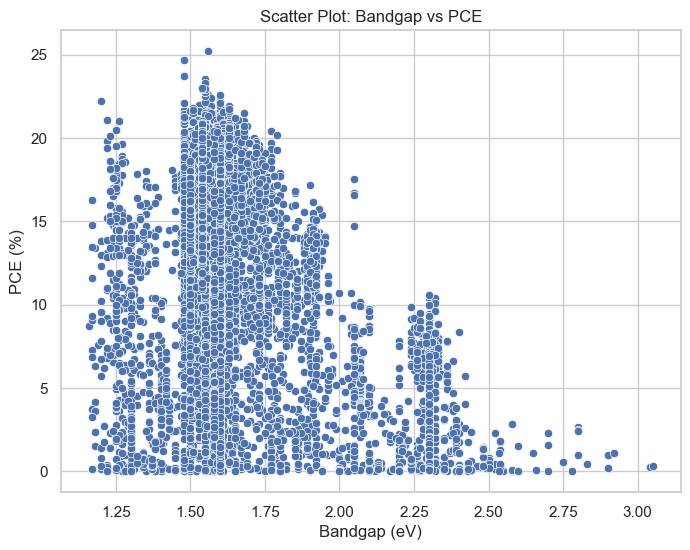

In [8]:
# In[4]: Bivariate Analysis - Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Perovskite_band_gap', y='JV_default_PCE', data=data_reduced)
plt.title('Scatter Plot: Bandgap vs PCE')
plt.xlabel('Bandgap (eV)')
plt.ylabel('PCE (%)')
plt.show()

## **Step 4: Correlation Matrix & Heatmap**
Compute and visualize correlations between numerical columns.

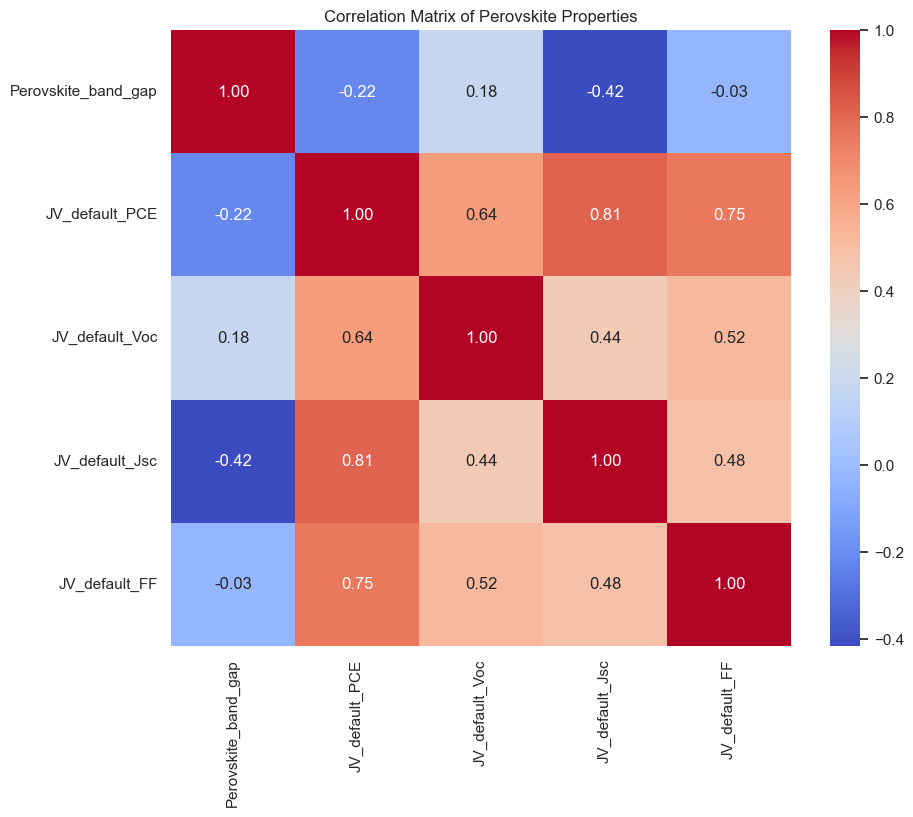

In [9]:
# In[5]: Correlation Matrix & Heatmap
corr_matrix = data_reduced.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Perovskite Properties')
plt.show()

## **Step 5: Advanced Correlation Analysis**
Calculate **Pearson** and **Spearman** correlations for each pair of numerical variables.

In [10]:
# In[6]: Pearson and Spearman Correlations
print("\nAdvanced Correlation Analysis:\n")
for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        col1 = numerical_columns[i]
        col2 = numerical_columns[j]
        pearson_corr, _ = pearsonr(data_reduced[col1], data_reduced[col2])
        spearman_corr, _ = spearmanr(data_reduced[col1], data_reduced[col2])
        print(f"Pearson correlation between {col1} and {col2}: {pearson_corr:.2f}")
        print(f"Spearman correlation between {col1} and {col2}: {spearman_corr:.2f}\n")


Advanced Correlation Analysis:

Pearson correlation between Perovskite_band_gap and JV_default_PCE: -0.22
Spearman correlation between Perovskite_band_gap and JV_default_PCE: -0.09

Pearson correlation between Perovskite_band_gap and JV_default_Voc: 0.18
Spearman correlation between Perovskite_band_gap and JV_default_Voc: 0.15

Pearson correlation between Perovskite_band_gap and JV_default_Jsc: -0.42
Spearman correlation between Perovskite_band_gap and JV_default_Jsc: -0.21

Pearson correlation between Perovskite_band_gap and JV_default_FF: -0.03
Spearman correlation between Perovskite_band_gap and JV_default_FF: 0.00

Pearson correlation between JV_default_PCE and JV_default_Voc: 0.64
Spearman correlation between JV_default_PCE and JV_default_Voc: 0.71

Pearson correlation between JV_default_PCE and JV_default_Jsc: 0.81
Spearman correlation between JV_default_PCE and JV_default_Jsc: 0.82

Pearson correlation between JV_default_PCE and JV_default_FF: 0.75
Spearman correlation between 

## **Step 6: Principal Component Analysis (PCA)**
- Reduce dimensionality and understand the variance in the dataset.
- Plot the first two principal components.

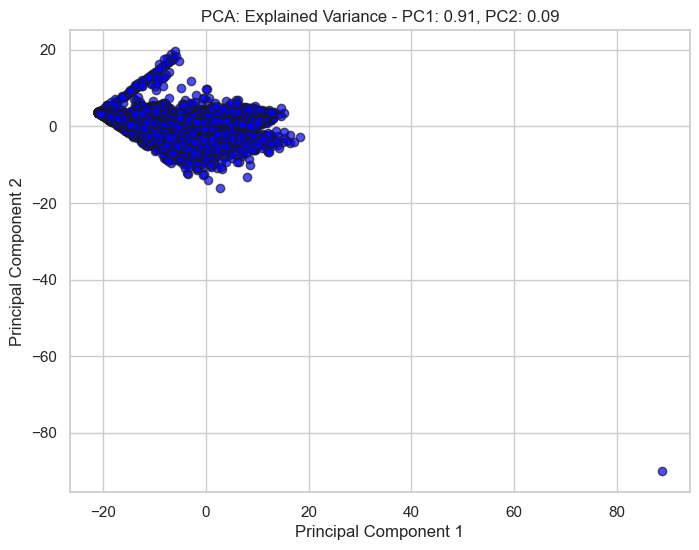

In [11]:
# In[7]: PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_reduced)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'PCA: Explained Variance - PC1: {explained_variance[0]:.2f}, PC2: {explained_variance[1]:.2f}')
plt.show()

## **Step 7: Clustering Analysis (KMeans)**
Perform K-Means clustering on the **original reduced dataset** (not necessarily the PCA projection) to see if there are any natural groupings.

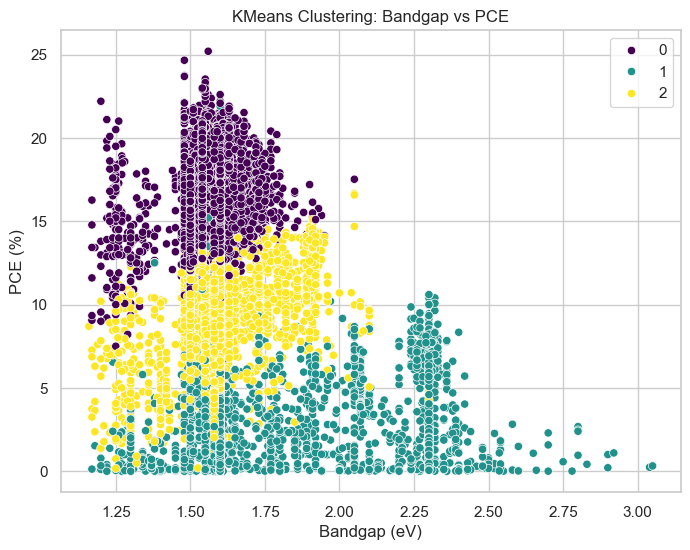

In [12]:
# In[8]: KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_reduced)
labels = kmeans.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Perovskite_band_gap', y='JV_default_PCE', hue=labels,
                palette='viridis', data=data_reduced, legend='full')
plt.title('KMeans Clustering: Bandgap vs PCE')
plt.xlabel('Bandgap (eV)')
plt.ylabel('PCE (%)')
plt.show()

## **Step 8: Pairplot for Multivariate Analysis**
Visualize pairwise relationships among all numerical variables.

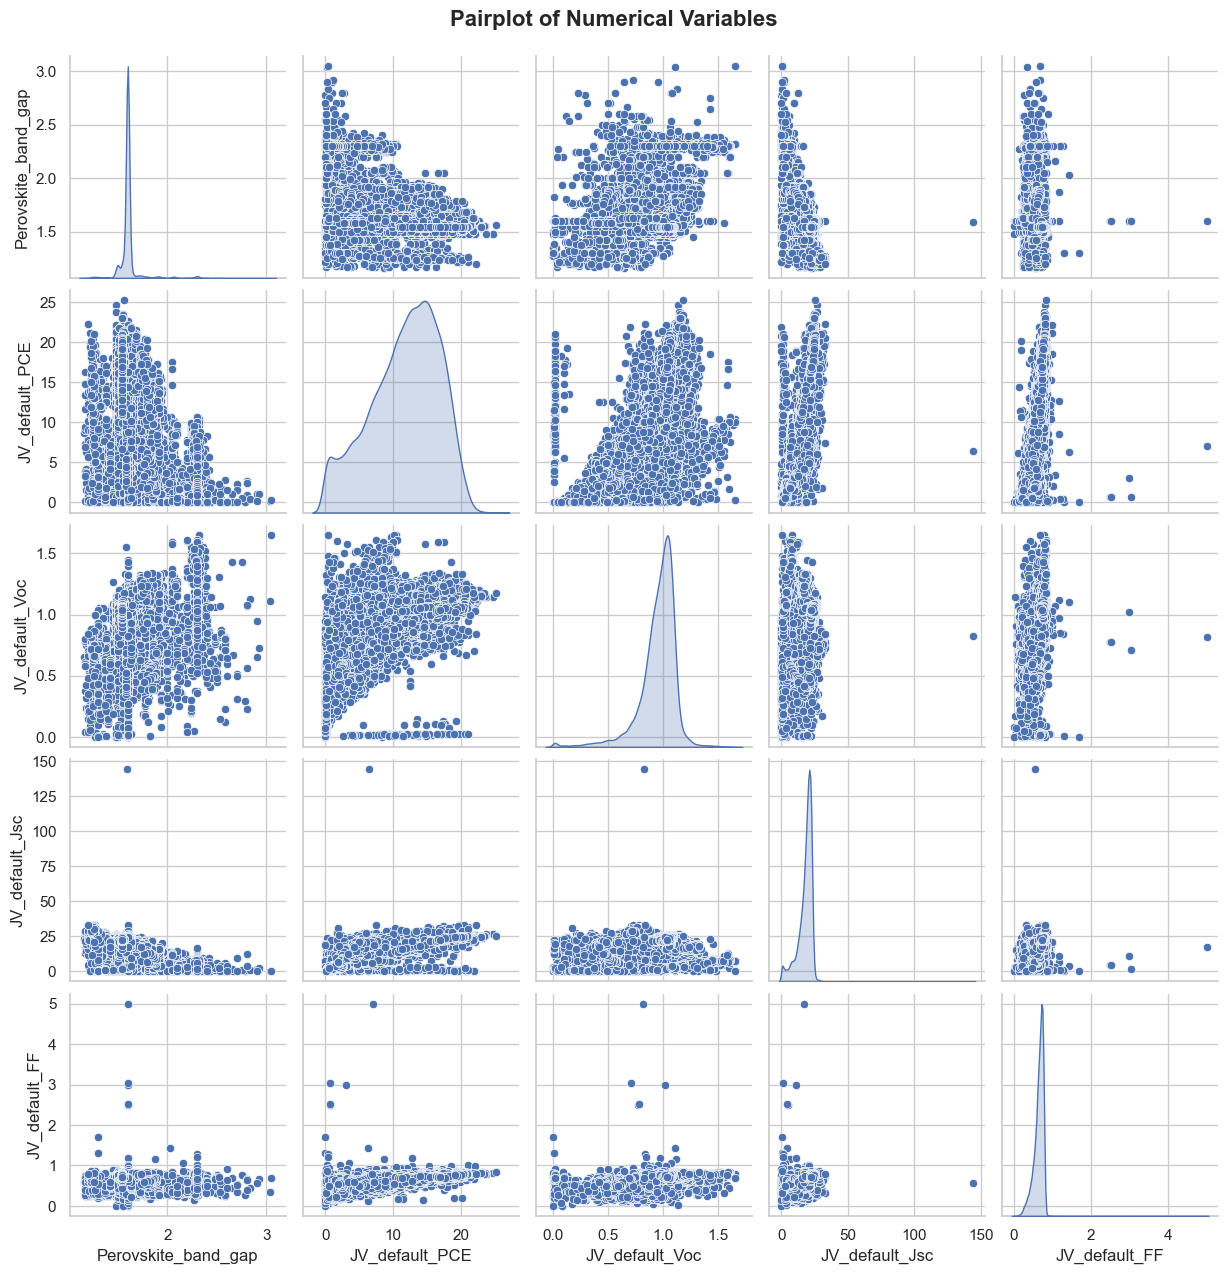

In [13]:
# In[9]: Pairplot
sns.pairplot(data_reduced, diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables', y=1.02, fontsize=16, fontweight='bold')
plt.show()

## Further Analysis
If your dataset has other columns—like publication date, device architecture, or composition details—you could extend the notebook to include time-series analysis (ARIMA), additional data cleaning (filtering rare categories), or advanced visualizations.

This concludes the basic pipeline for perovskite data analysis:
1. **Data Cleaning**
2. **Univariate & Bivariate Analysis**
3. **Correlation Analysis**
4. **Dimensionality Reduction (PCA)**
5. **Clustering (KMeans)**
6. **Pairwise Visualizations**

In [16]:
import pandas as pd
import numpy as np

# 1. Specify the file path to your original dataset
file_path = 'perovskite_database_query.csv'

# 2. Read the dataset
dataset = pd.read_csv(file_path, low_memory=False)
print("Initial dataset shape:", dataset.shape)

# 3. Remove reference columns that are not needed
reference_columns = [
    'Ref_ID_temp',
    'Ref_ID',
    'Ref_name_of_person_entering_the_data',
    'Ref_data_entered_by_author',
    'Ref_DOI_number',
    'Ref_lead_author',
    'Ref_publication_date',
    'Ref_journal',
    'Ref_part_of_initial_dataset',
    'Ref_original_filename_data_upload',
    'Ref_free_text_comment',
    'Ref_internal_sample_id'
]
dataset.drop(columns=reference_columns, axis=1, errors='ignore', inplace=True)
print("After removing reference columns, shape:", dataset.shape)

# 4. Remove columns with more than 50% missing data
threshold = 90  # percentage threshold
missing_percentage = dataset.isnull().mean() * 100
cols_to_drop = missing_percentage[missing_percentage > threshold].index
dataset.drop(columns=cols_to_drop, axis=1, inplace=True)
print(f"After dropping columns with >{threshold}% missing data, shape:", dataset.shape)

# 5. Identify columns with mixed data types (optional check)
mixed_columns = [
    col for col in dataset.columns 
    if dataset[col].apply(type).nunique() > 1
]
if mixed_columns:
    print("\nColumns with mixed data types:", mixed_columns)
else:
    print("\nNo mixed-type columns identified.")

# 6. Save the cleaned dataset to a new CSV file
output_file = 'cleanedData.csv'
dataset.to_csv(output_file, index=False)
print(f"\nCleaned dataset saved as {output_file}")


Initial dataset shape: (42978, 410)
After removing reference columns, shape: (42978, 398)
After dropping columns with >90% missing data, shape: (42978, 230)

Columns with mixed data types: ['Cell_stack_sequence', 'Substrate_stack_sequence', 'Substrate_deposition_procedure', 'ETL_thickness', 'ETL_additives_compounds', 'ETL_deposition_procedure', 'ETL_deposition_aggregation_state_of_reactants', 'ETL_deposition_synthesis_atmosphere', 'ETL_deposition_solvents', 'ETL_deposition_solvents_supplier', 'ETL_deposition_solvents_purity', 'ETL_deposition_reaction_solutions_compounds_supplier', 'ETL_deposition_reaction_solutions_compounds_purity', 'ETL_deposition_reaction_solutions_volumes', 'ETL_deposition_reaction_solutions_age', 'ETL_deposition_reaction_solutions_temperature', 'ETL_deposition_substrate_temperature', 'ETL_deposition_thermal_annealing_temperature', 'ETL_deposition_thermal_annealing_time', 'ETL_deposition_thermal_annealing_atmosphere', 'ETL_storage_atmosphere', 'Perovskite_dimension